In [1]:
from oggm import utils
import geopandas as gpd
rgi_file = utils.get_rgi_region_file(14, version='62')  # This is East Asia

In [6]:
import shapely.geometry as shpg
import xarray as xr

In [2]:
# Read it
rgi_df = gpd.read_file(rgi_file)

In [3]:
fpath = 'zip://Astore.zip/Astore'
basin_df = gpd.read_file(fpath)

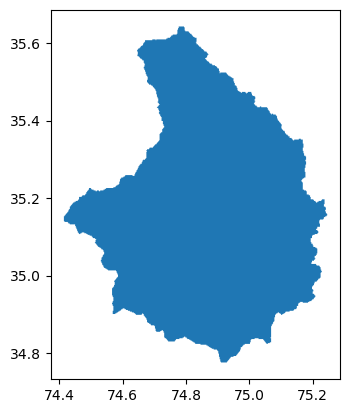

In [4]:
basin_df.plot();

In [5]:
in_basin = [basin_df.geometry.contains(shpg.Point(x, y))[0] for (x, y) in zip(rgi_df.CenLon, rgi_df.CenLat)]

In [6]:
rgi_df_sel = rgi_df.loc[in_basin]

In [9]:
path = '/home/www/lschuster/provide/runoff_example_data/for_fahad/runoff_rounce_INDUS_ssp585_monthly.nc'
with xr.open_dataset(path) as ds:
    ds.sel(rgi_id=rgi_df_sel['RGIId'].values).to_netcdf('../../share/world_basins/rounce_data/Astore/runoff_rounce_Astore_ssp585_monthly.nc')

In [10]:
path = '/home/www/lschuster/provide/runoff_example_data/for_fahad/runoff_rounce_INDUS_ssp126_monthly.nc'
with xr.open_dataset(path) as ds:
    ds.sel(rgi_id=rgi_df_sel['RGIId'].values).to_netcdf('../../share/world_basins/rounce_data/Astore/runoff_rounce_Astore_ssp126_monthly.nc')

In [11]:
path = '/home/www/lschuster/provide/runoff_example_data/for_fahad/runoff_rounce_INDUS_ssp245_monthly.nc'
with xr.open_dataset(path) as ds:
    ds.sel(rgi_id=rgi_df_sel['RGIId'].values).to_netcdf('../../share/world_basins/rounce_data/Astore/runoff_rounce_Astore_ssp245_monthly.nc')

In [12]:
path = '/home/www/lschuster/provide/runoff_example_data/for_fahad/runoff_rounce_INDUS_ssp370_monthly.nc'
with xr.open_dataset(path) as ds:
    ds.sel(rgi_id=rgi_df_sel['RGIId'].values).to_netcdf('../../share/world_basins/rounce_data/Astore/runoff_rounce_Astore_ssp370_monthly.nc')

In [3]:
fpath = 'zip://uib_corrected.zip/uib_corrected'
basin_df = gpd.read_file(fpath)

In [7]:
in_basin = [basin_df.geometry.contains(shpg.Point(x, y))[0] for (x, y) in zip(rgi_df.CenLon, rgi_df.CenLat)]

In [8]:
rgi_df_sel = rgi_df.loc[in_basin]

In [9]:
len(rgi_df_sel)

13529

In [10]:
path = '/home/www/lschuster/provide/runoff_example_data/for_fahad/runoff_rounce_INDUS_ssp585_monthly.nc'
with xr.open_dataset(path) as ds:
    ds_ids = ds.rgi_id.values

In [12]:
rgi_df_sel = rgi_df_sel.loc[rgi_df_sel.RGIId.isin(ds_ids)]

In [13]:
len(rgi_df_sel)

13518

In [14]:
path = '/home/www/lschuster/provide/runoff_example_data/for_fahad/runoff_rounce_INDUS_ssp585_monthly.nc'
with xr.open_dataset(path) as ds:
    ds.sel(rgi_id=rgi_df_sel['RGIId'].values).to_netcdf('../../share/world_basins/rounce_data/UpperIndus/runoff_rounce_UpperIndus_ssp585_monthly.nc')

In [15]:
path = '/home/www/lschuster/provide/runoff_example_data/for_fahad/runoff_rounce_INDUS_ssp126_monthly.nc'
with xr.open_dataset(path) as ds:
    ds.sel(rgi_id=rgi_df_sel['RGIId'].values).to_netcdf('../../share/world_basins/rounce_data/UpperIndus/runoff_rounce_UpperIndus_ssp126_monthly.nc')

In [16]:
path = '/home/www/lschuster/provide/runoff_example_data/for_fahad/runoff_rounce_INDUS_ssp245_monthly.nc'
with xr.open_dataset(path) as ds:
    ds.sel(rgi_id=rgi_df_sel['RGIId'].values).to_netcdf('../../share/world_basins/rounce_data/UpperIndus/runoff_rounce_UpperIndus_ssp245_monthly.nc')

In [17]:
path = '/home/www/lschuster/provide/runoff_example_data/for_fahad/runoff_rounce_INDUS_ssp370_monthly.nc'
with xr.open_dataset(path) as ds:
    ds.sel(rgi_id=rgi_df_sel['RGIId'].values).to_netcdf('../../share/world_basins/rounce_data/UpperIndus/runoff_rounce_UpperIndus_ssp370_monthly.nc')

In [40]:
fpath = 'zip://UIB_shape.zip/UIB_shape'
basin_df = gpd.read_file(fpath)

In [41]:
geom = basin_df.geometry.iloc[0]

In [42]:
type(geom)

shapely.geometry.multipolygon.MultiPolygon

In [43]:
[g.area for g in geom.geoms]

[1.5432134234665122e-07,
 7.716067117332561e-08,
 7.716042134621264e-08,
 7.716042134621264e-08,
 16.997179904902573]

In [44]:
main = geom.geoms[-1]

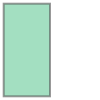

In [45]:
geom.geoms[0]

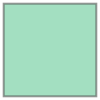

In [46]:
geom.geoms[1]

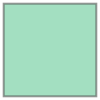

In [47]:
geom.geoms[2]

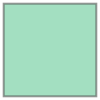

In [48]:
geom.geoms[3]

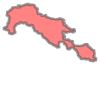

In [49]:
geom.geoms[4]

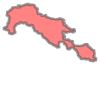

In [50]:
main

In [51]:
from shapely.validation import explain_validity, make_valid

In [52]:
explain_validity(main)

'Ring Self-intersection[77.1162500027355 32.9845833338538]'

In [53]:
main_cor = make_valid(main)

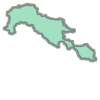

In [54]:
main_cor

In [55]:
basin_df_new = basin_df[['Id', 'geometry']].copy()

In [56]:
basin_df_new['geometry'] = [main_cor]

In [57]:
basin_df_new.to_file('uib_corrected.shp')

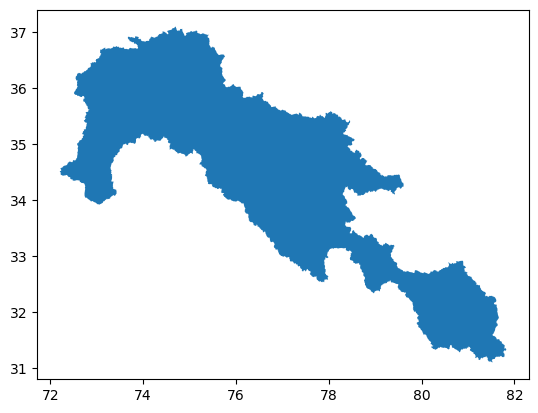

In [58]:
basin_df_new.plot();